In [5]:
import pandas as pd

df = pd.read_csv(
    'fb.csv',
    parse_dates = ['Date'],
    index_col = 'Date',
    ).rename(columns={
        'Close/Last':'close',
        'Open':'open',
        'High':'high',
        'Low':'low',
        'Volume':'volume'
    }).sort_index()

df

,close,volume,open,high,low
Date,,,,,
2012-05-18,$38.2318,579377500,$42,$45,$38
2012-05-21,$34.03,167943600,$36.53,$36.66,$33
2012-05-22,$31,101667700,$32.61,$33.59,$30.94
2012-05-23,$32,73541150,$31.37,$32.5,$31.36
2012-05-24,$33.03,50208760,$32.95,$33.21,$31.77
...,...,...,...,...,...
2021-09-23,$345.96,21806260,$345.355,$349.67,$343
2021-09-24,$352.96,18801930,$343.239,$354.35,$342.37
2021-09-27,$353.58,15205840,$349.805,$355.15,$347.08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-05-18 to 2021-09-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2357 non-null   object
 1   volume  2357 non-null   int64 
 2   open    2357 non-null   object
 3   high    2357 non-null   object
 4   low     2357 non-null   object
dtypes: int64(1), object(4)
memory usage: 110.5+ KB


In [7]:
def remove_dollar_sign(x: str) -> float:
    if x[0] != '$':
        raise ValueError()
    return float(x[1:])

for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map(remove_dollar_sign)

df

,close,volume,open,high,low
Date,,,,,
2012-05-18,38.2318,579377500,42.000,45.00,38.00
2012-05-21,34.0300,167943600,36.530,36.66,33.00
2012-05-22,31.0000,101667700,32.610,33.59,30.94
2012-05-23,32.0000,73541150,31.370,32.50,31.36
2012-05-24,33.0300,50208760,32.950,33.21,31.77
...,...,...,...,...,...
2021-09-23,345.9600,21806260,345.355,349.67,343.00
2021-09-24,352.9600,18801930,343.239,354.35,342.37
2021-09-27,353.5800,15205840,349.805,355.15,347.08


In [8]:
df = df.assign(
    close_mean = lambda x: x['close'].rolling('14D').mean()
)

<AxesSubplot: xlabel='Date'>

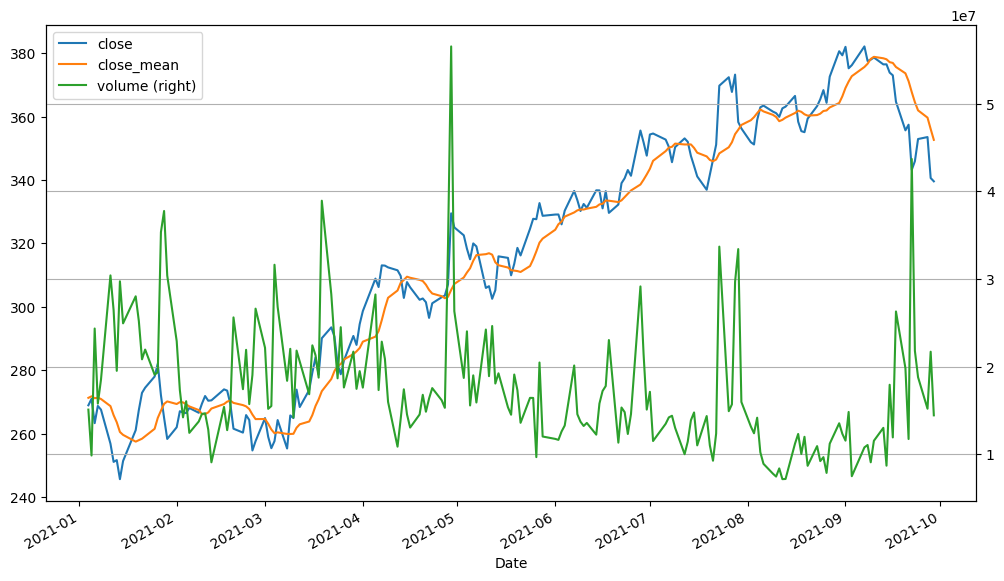

In [9]:
from_ = '2021'
to = '2022'

df[from_:to].plot(
    y=['close', 'close_mean', 'volume'],
    figsize=(12, 7),
    grid=True,
    secondary_y=['volume'],
)